# Anisotropy Macrospin Example #
Author: Colin Jermain, Minh-Hai Nguyen

In [1]:
import sys, importlib
sys.path.append("../")

In [2]:
import numpy as np
import pymacrospin.parameters as params
from pymacrospin import demag, plot
import pymacrospin.kernels as kernels
# import pymacrospin.numba.kernels as kernels # Run this if want to use numba kernels
import pymacrospin.simulations as sims

from matplotlib import pyplot as plt

In [3]:
# Consider a cylinder
length = 200e-7 # cm - major axis
width = 100e-7 # cm - minor axis
height = 5e-7 # cm - height

Nx, Ny, Nz = demag.cylinder(length, width, height, cgs=True)
Nx, Ny, Nz

(0.35101843956248724, 0.9185401975596108, 11.296811977237075)

In [8]:
parameters = {
    'uniaxial': True,
    'Ms': 140, # Saturation Magnetization (emu/cc)
    'dt': 5e-13, # Timestep (sec)
    'damping': 0.01, # Gilbert damping
    'Hext': [0., 1e3, 0.], # External field (Oe)
    'm0': [-0.999, 0.001, 0.001], # Initial moment (normalized)
    'Nd': [Nx, Ny, Nz], # Demag tensor diagonals
    'u': [0, 0, 1], # Uniaxial anisotropy unit vector along z axis
    'Ku1': 40, # 1st Uniaxial Anisotropy energy (erg/cc)
    'Ku2': 1, # 2nd Uniaxial Anisotropy energy (erg/cc)
}

kernel = kernels.AnisotropyKernel(**parameters)

In [9]:
kernel.reset()
times, moments = kernel.run(20e-9, num_points=2000)

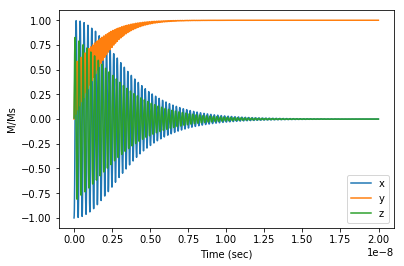

In [10]:
plot.moment_time_domain(times, moments)
plt.show()

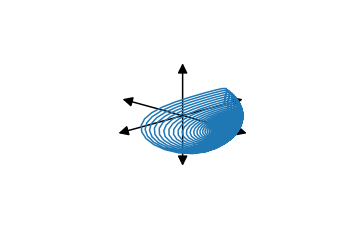

In [11]:
ax = plot.moment_3d(moments)
plt.show()

### Linear field sweep
An important signature of uniaxial anisotropy is the hysteresis of the magnetoresistance trace. We can readily show that by sweeping the external in from $-x$ to $+x$ then backward.

In [12]:
simulation = sims.FieldSweep(kernel)

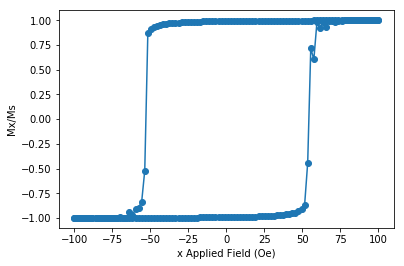

In [13]:
fields, moments, times = simulation.sweep_linear([-1e2,10,0],[1e2,10,0],100,return_time=True)

plt.plot(fields[:,0], moments[:,0], 'o-')
# plt.ylim(-1.1, 1.1)
plt.ylabel("Mx/Ms")
plt.xlabel("x Applied Field (Oe)")
plt.show()

Hysteresis is clearly seen.